### **Question**

Generate clustering ( kmean, hierarchy clustering, and DbScan) for the airlines data to obtain an optimum number of clusters.

1. K mean with an optimum number of clusters (k)

2. Hierarchy cluster with Dendrogram

3. DBScan cluster 

4. Draw the inferences from the clusters obtained.



###**Importing Modules**

In [ ]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.express as px
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs
from pandas import DataFrame
from abc import ABC,abstractmethod
from sklearn.base import clone

#Preprocessing methods
from sklearn.preprocessing import StandardScaler

#Split the training and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

### performance matrix
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import plot_confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error,r2_score,make_scorer

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
!jupyter nbconvert --to html /content/drive/MyDrive/SemesterThree/Stats7300/Assignment9/Assignment9.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SemesterThree/Stats7300/Assignment9/Assignment9.ipynb to html
[NbConvertApp] Writing 2635123 bytes to /content/drive/MyDrive/SemesterThree/Stats7300/Assignment9/Assignment9.html


### **Input Data**

In [5]:
dfDataset = pd.read_excel('/content/drive/MyDrive/SemesterThree/Stats7300/Assignment9/EastWestAirlines.xlsx', 'data')

In [6]:
dfDataset.shape


(3999, 12)

In [7]:
dfDataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## **EDA** 

**Data Description:**

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger, the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

**ID** --Unique ID

**Balance**--Number of miles eligible for award travel

**Qual_mile**--Number of miles counted as qualifying for Topflight status

**cc1_miles** -- Number of miles earned with freq. flyer credit card in the past 12 months: 

**cc2_miles** -- Number of miles earned with Rewards credit card in the past 12 months: 

**cc3_miles** -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

**Bonus_miles**--Number of miles earned from non-flight bonus transactions in the past 12 months

**Bonus_trans**--Number of non-flight bonus transactions in the past 12 months

**Flight_miles_12mo**--Number of flight miles in the past 12 months

**Flight_trans_12**--Number of flight transactions in the past 12 months

**Days_since_enrolled**--Number of days since enrolled in flier program

**Award**--whether that person had award flight (free flight) or not


- As mentioned in Data discription there are 12 columns where cc_miles are categorical and award is binary column.

- Rest all columns have numerical values.




In [10]:
dfDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### **Null checks**

In [11]:
dfDataset.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### **Duplication Checks**

In [12]:
dfDataset.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

### **Summary Statistics**

In [13]:
dfDataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


From the describe command we get the statistics summary.

From this summary statistics we can conclude following:-

There are 3999 records with null values.

The min value of ID column is 1 and maximum is 4021, that shows ids are not missing.

- cc_miles - 3 Categorial value columns.

- Award? - Binary column.


### **EDA Univariate Analysis**

For Univariate analysis lets first divide the features in **continuous** and **categorical**.

In [20]:
num_cols = ["Balance","Qual_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll"]
binary_cols = ["Award?"]
categ_cols1 = ["cc1_miles","cc2_miles","cc3_miles"]

We perform univariate analysis to check the distributions (using **Histograms**)of all continuous variables and understand their statistical inference. 

Similarly for categorical variables we check their **bar** plots and visualiza them. 

Feature Name : Balance
Skew : 5.0


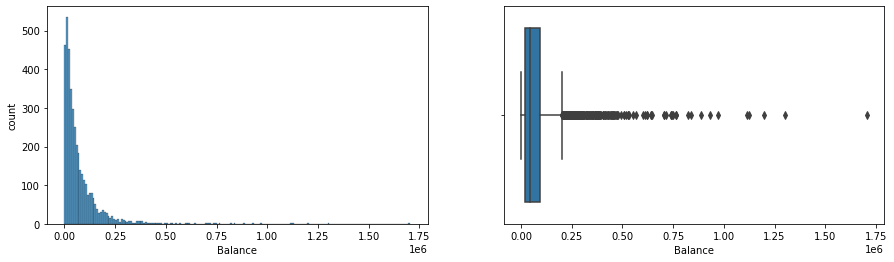

Feature Name : Qual_miles
Skew : 7.51


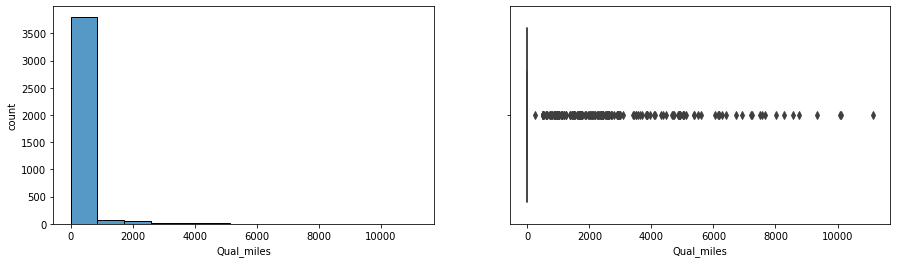

Feature Name : Bonus_miles
Skew : 2.84


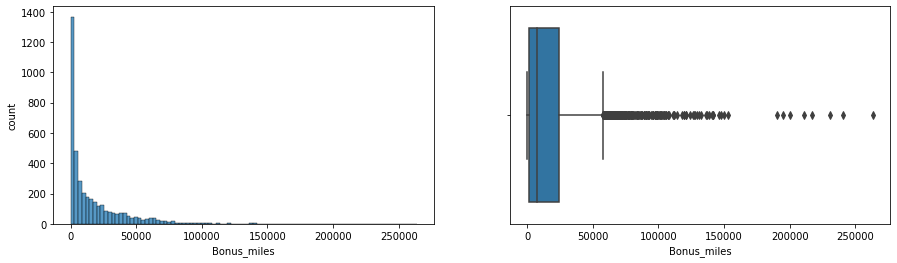

Feature Name : Bonus_trans
Skew : 1.16


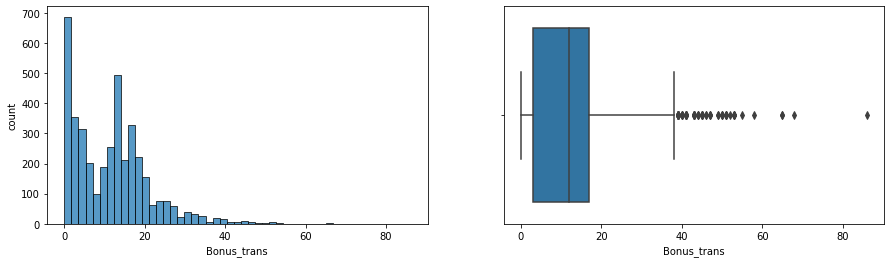

Feature Name : Flight_miles_12mo
Skew : 7.45


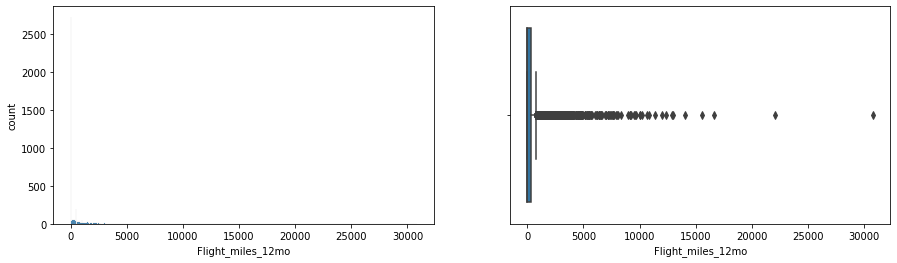

Feature Name : Flight_trans_12
Skew : 5.49


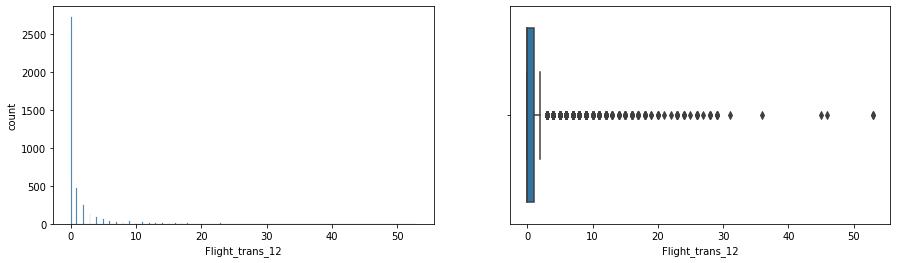

Feature Name : Days_since_enroll
Skew : 0.12


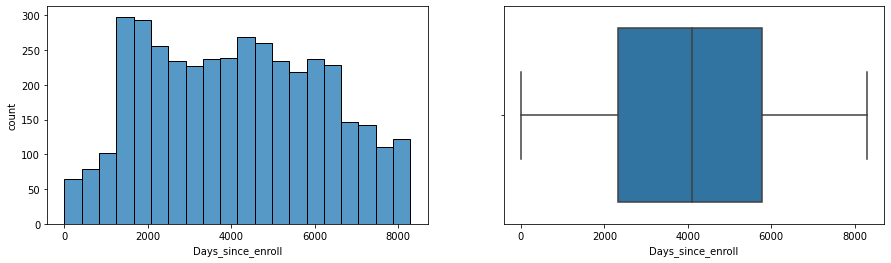

In [17]:
for col in num_cols:
    print('Feature Name :',col)
    print('Skew :', round(dfDataset[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=dfDataset[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dfDataset[col])
    plt.show()

**Insights**

From hist plots and box plots we can learn following key points :-

- Most of the features are right skewed and with outliers.

- Distribution of features is fairly normalized with right skew.

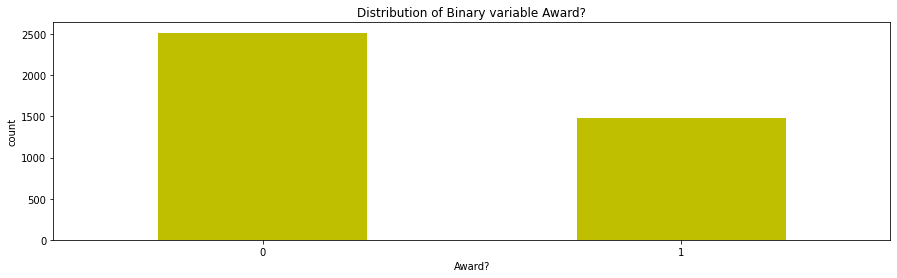

In [21]:
for col in binary_cols:
   
    plt.figure(figsize = (15, 4))
    dfDataset[col].value_counts(sort=True).plot(
        kind='bar', color='y', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Binary variable "+ col)
    plt.show()

**Insights**

- Number of people without award flight is more that those who didn't have.

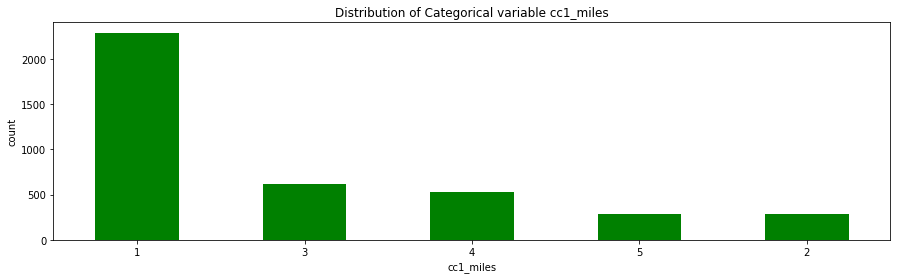

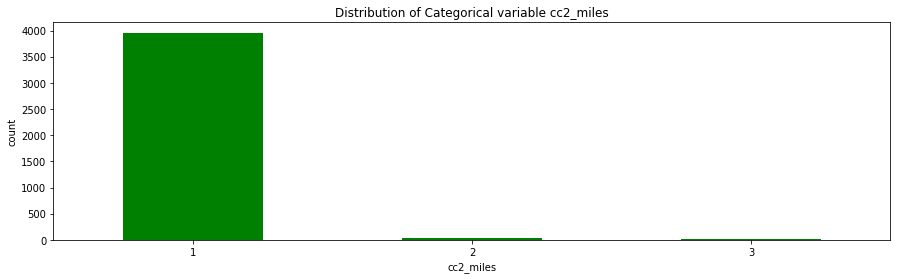

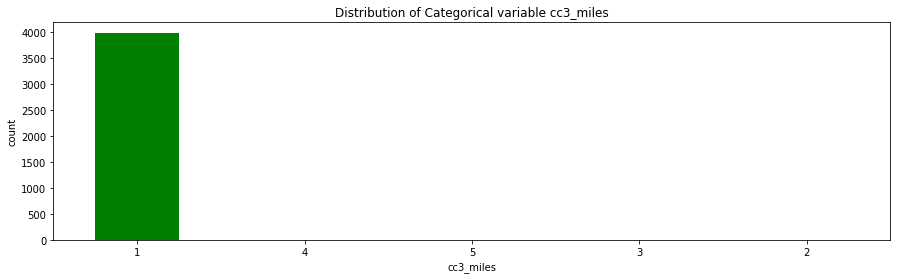

In [22]:
for col in categ_cols1:
   
    plt.figure(figsize = (15, 4))
    dfDataset[col].value_counts(sort=True).plot(
        kind='bar', color='g', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Categorical variable "+ col)
    plt.show()

**Insights**

From the count plots, we can get following observations:-

- Most of the users are using cc miles earned on frequent flyer credit card followed by reward.

- Only less than 5000 users have earned miles with small business card as expected its number is less as compared to first two categories.

### **EDA Bivariate Analysis**

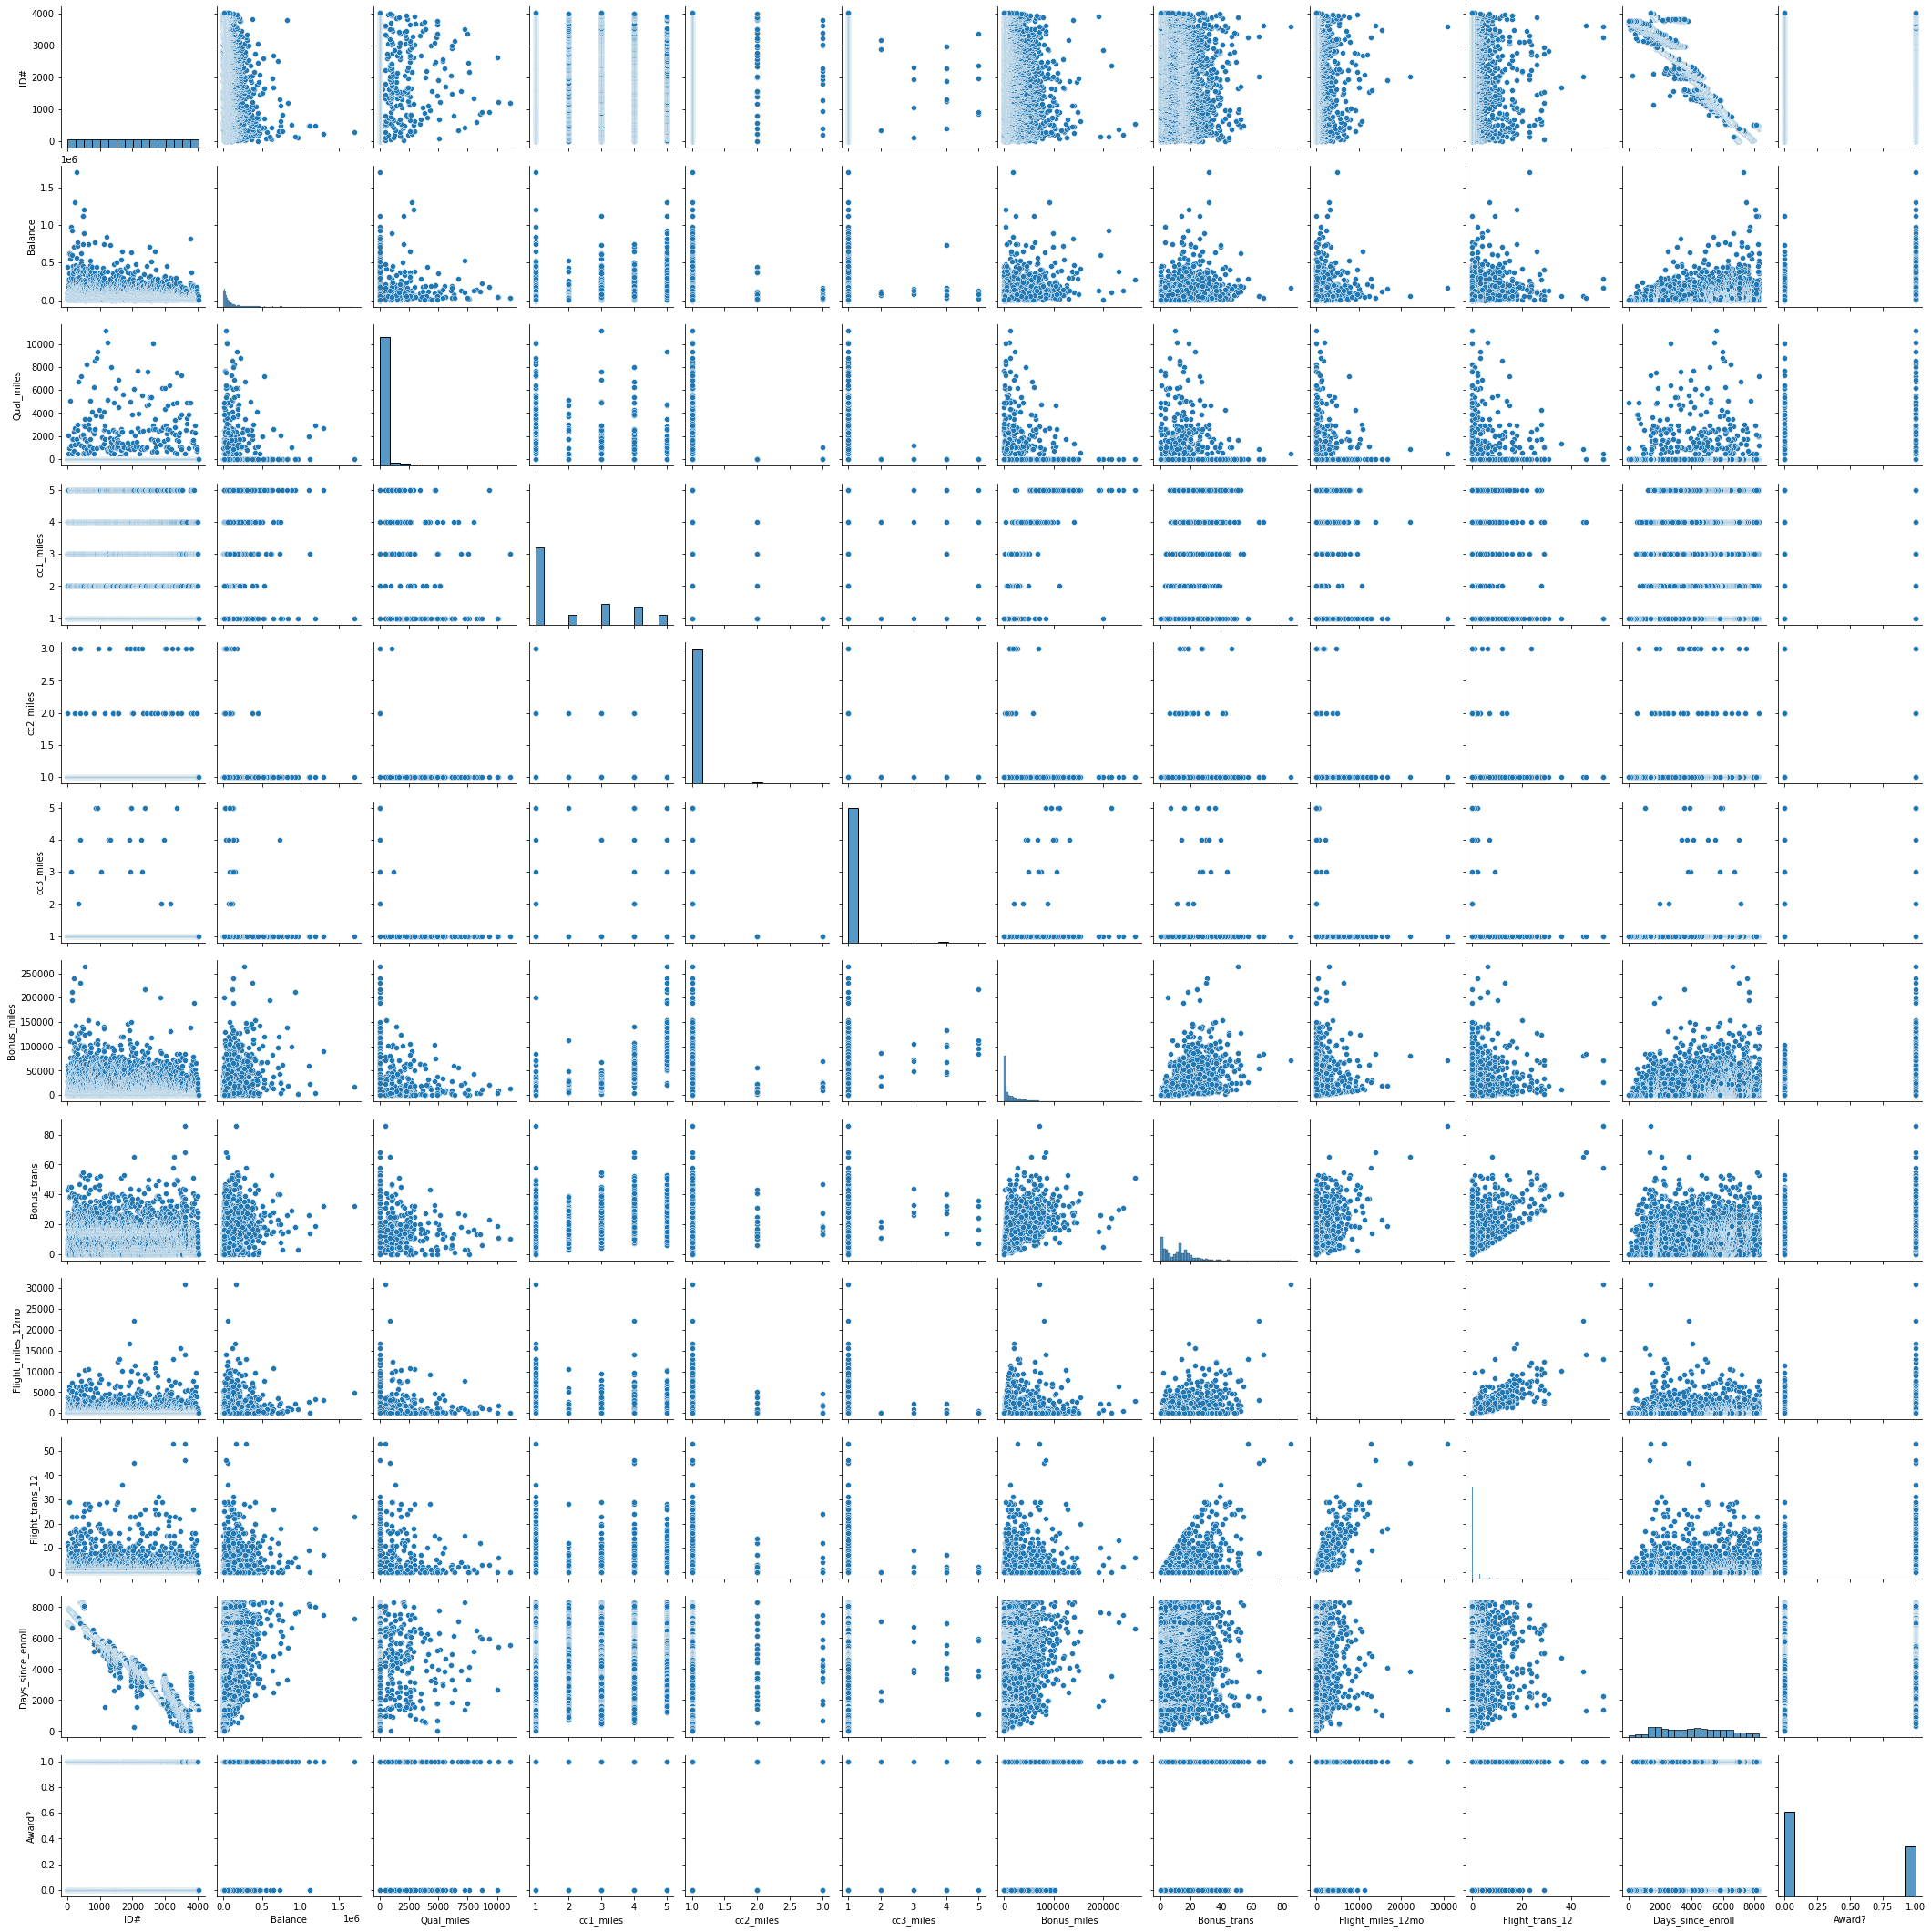

In [24]:
sns.pairplot(dfDataset)
plt.show()

Insights drawn from pair plots:

- As the ID is increased days since enroll decreases, showing negative correlation.
- Positive correlation is observed in Flight_miles_12mo and Flight_trans_12--Number which makes sense.

- Bonus miles and bonus transaction are correlated positively.

### **EDA Multivariate Analysis**

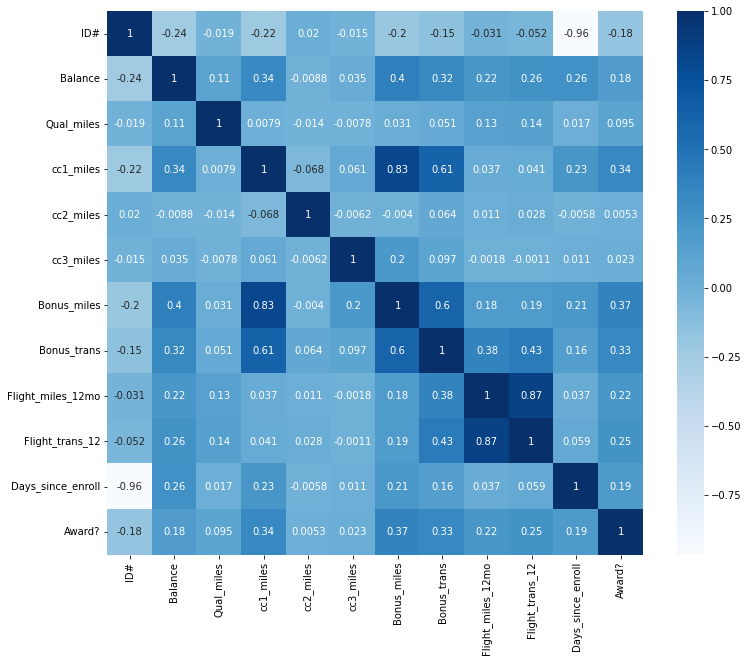

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(dfDataset.corr(), annot=True, cmap='Blues')
plt.show()

**Insigths**

From the Heat map, we can conculde the following:

CC features are categorical so could not be utilized here.

- Positive correlation is observed in Flight_miles_12mo and Flight_trans_12--Number with 0.87 correlation coefficient.

- Bonus miles and bonus transaction are correlated with 0.6 positive relation.


### **Feature Scaling**

In [8]:
scaler = StandardScaler()
dfDataset = scaler.fit_transform(dfDataset)

In [9]:
dfDataset

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# **1) K mean with an optimum number of clusters (k)**

## **Elbow method**

In [166]:
### Computing optimal cluster with elbow method
from sklearn.cluster import KMeans
k = []
wcss = []

for i in range(1,10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(dfDataset)
  k.append(i)
  wcss.append(mdl.inertia_)

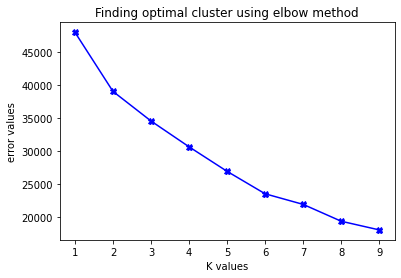

In [169]:
plt.plot(k,wcss,'bX-')
plt.title("Finding optimal cluster using elbow method")
plt.xlabel("K values")
plt.ylabel("error values")
plt.show()


From the K value plot we can be sure that for cluster size 2 the error starts decreasing in constant fasion and curve plateaus.

Thus 2 is th optimal cluster as per the elbow technique.

Now we will use PCA to reduce 12 features to 2 using PCA.

## a) Show top 2 of the PCA component output

In [13]:
### PCA component
class PCA:
    """
     Implement the PCA from scratch
    """
    def __init__(self, n_components):
        """
         Constructor for PCA class

        Args:
            n_components (_type_): _description_
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        """
        Fit the PCA model

        Args:
            X (_type_): _description_
        """
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [14]:
# Project the data onto the 3 primary principal components
pca = PCA(2)
pca.fit(dfDataset)
X_projected = pca.transform(dfDataset)

print("Shape of X:", dfDataset.shape)
print("Shape of transformed X:", X_projected.shape)



Shape of X: (3999, 12)
Shape of transformed X: (3999, 2)


In [171]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

Transformed 12 feature variables into 3 components with highest variance as per asked.

## b) Plot the PCA 1, PCA 2 components

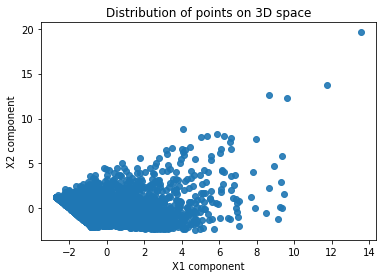

In [176]:
fig = plt.figure()
ax = plt.axes()



# Data for three-dimensional scattered points
ax.scatter(x1, x2,alpha= 0.9)
plt.title("Distribution of points on 3D space")
plt.xlabel("X1 component")
plt.ylabel("X2 component")

plt.show()

## Helper functions for K-means

In [159]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [160]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [161]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [162]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [163]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [164]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

## K-means

In [145]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster


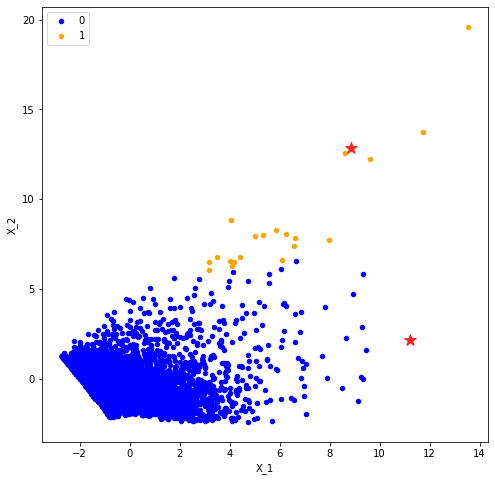

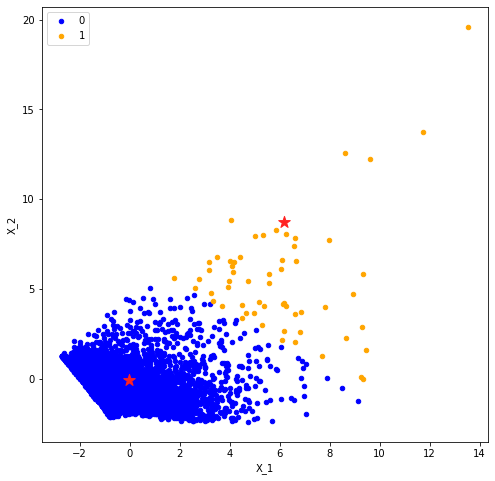

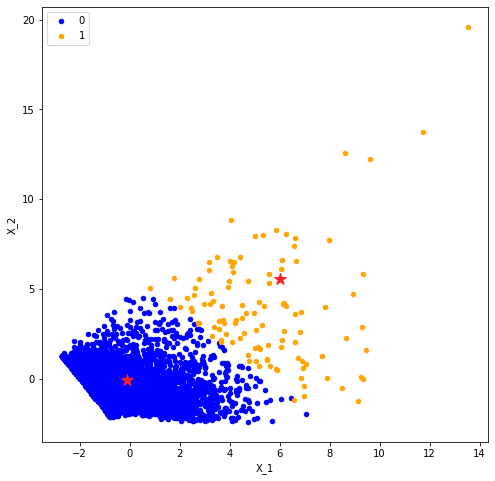

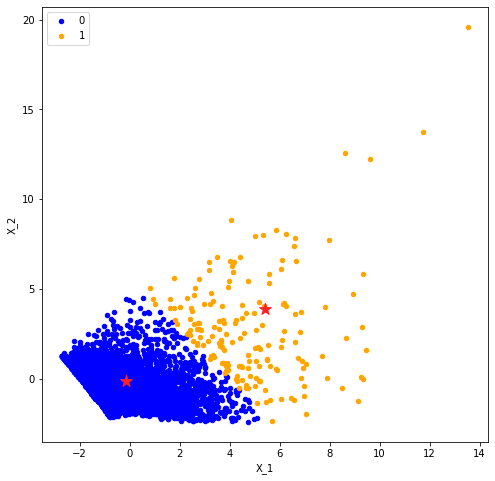

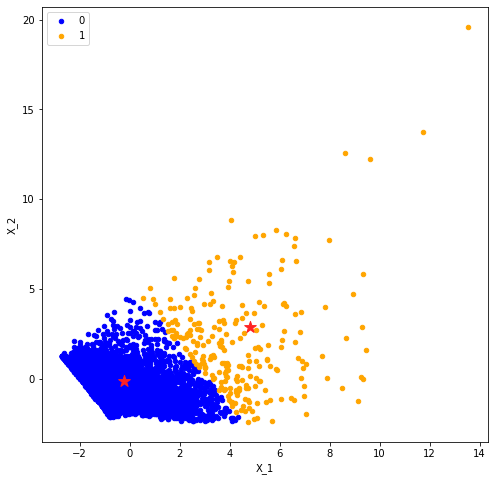

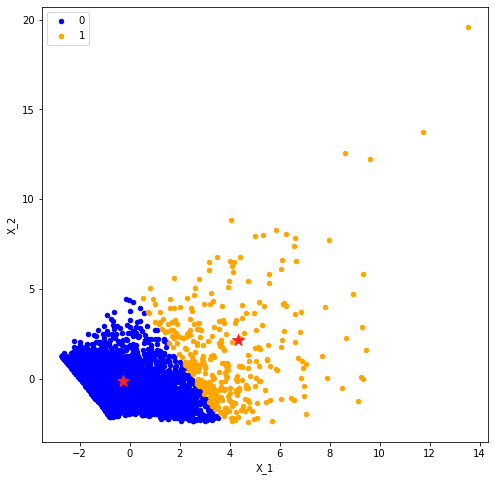

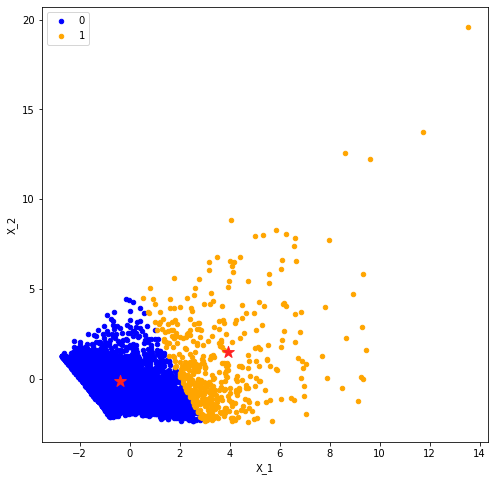

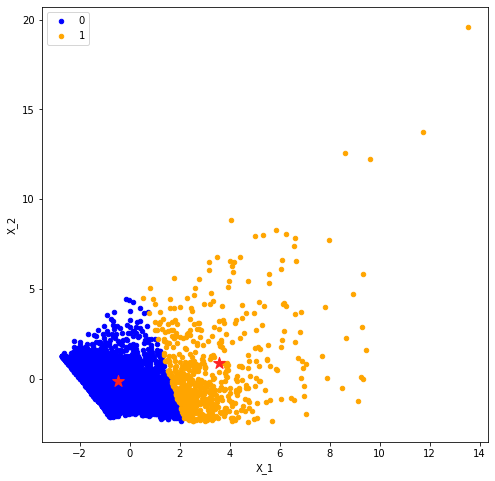

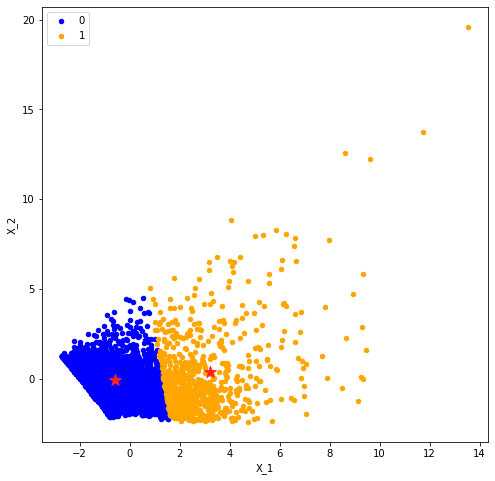

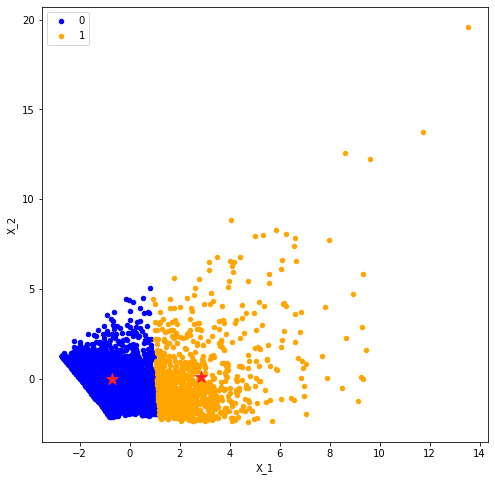

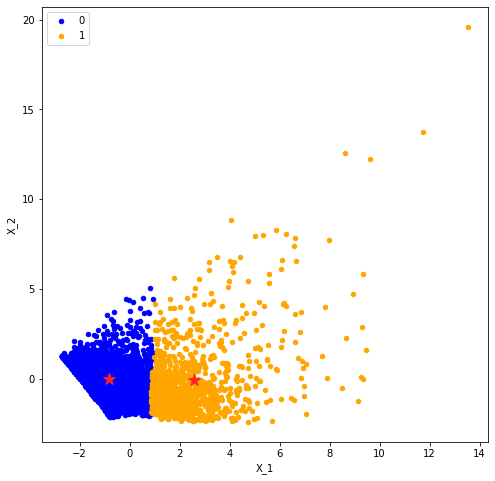

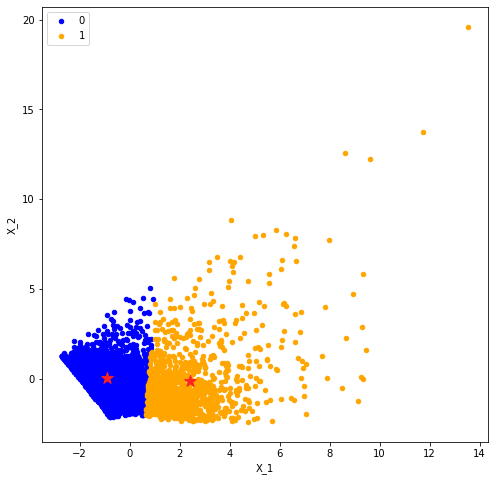

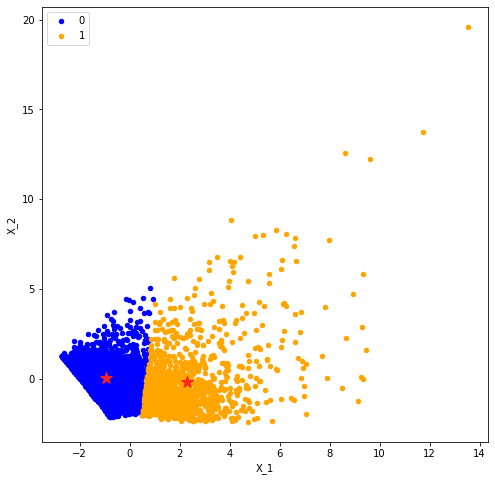

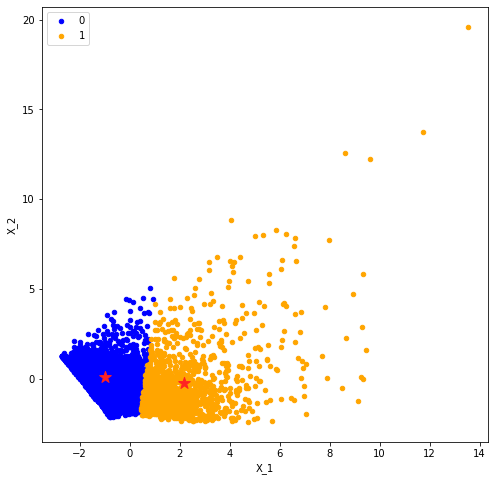

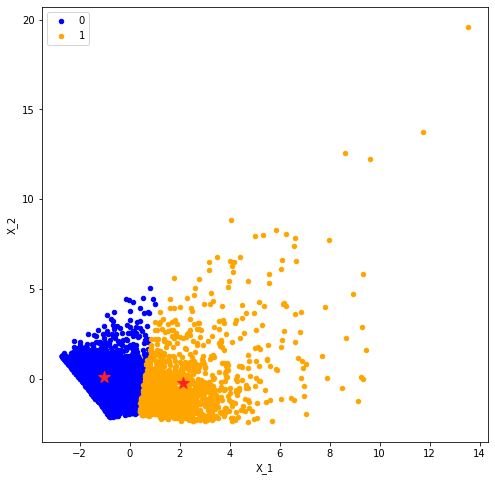

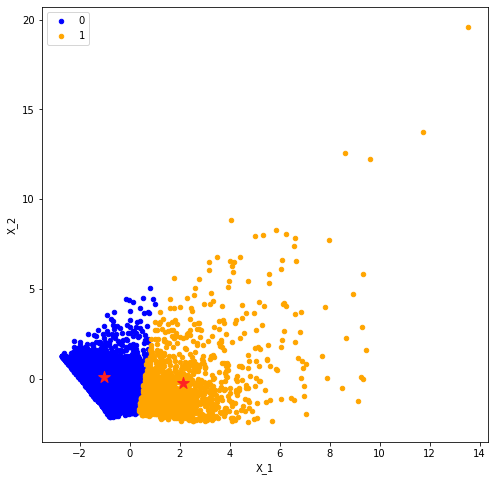

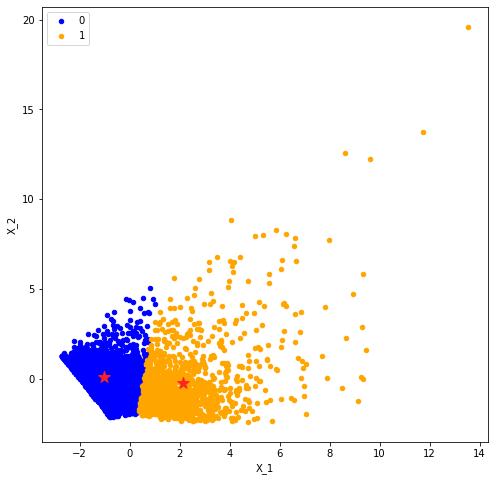

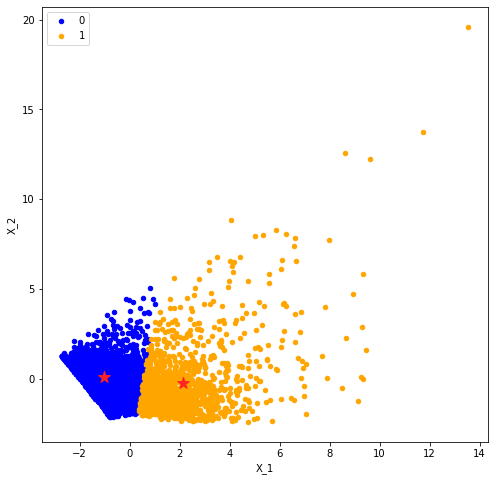

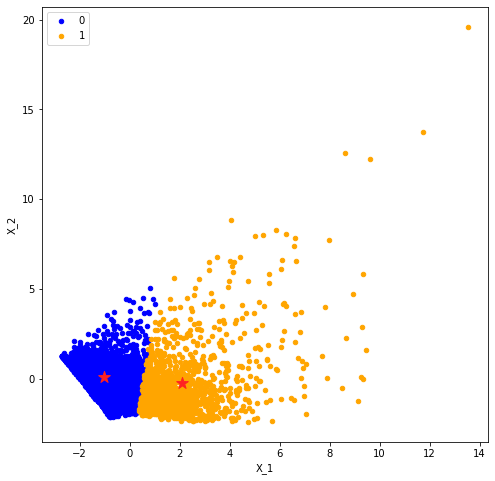

In [177]:
cluster = k_means(2, X_projected)

### PCA


---


- As we had total 12 features for the purpose of making sense out of it we used 
PCA and projected them into lower dimensions.

- Dimentionality reduction using PCA gave projected components x_1 and x_2 which are used for clustering using KMeans custom model.

- Thus PCA is summerizing 12 features for each internet user into 2 dimentions.

- Reducing the number of features, we are improving the performance of our algorithm Kmeans. 

- By decreasing the number of features the noise and thereby complexity of model is also reduced.


### Clustering 





---


- In Kmeans clustering cluster size of 2 is selected using elbow method and iterative clustering is performed.

- Each iteration centroids are changing and after 19th iteration we stopped as centroids started to be at constant position.

- It is distinguishable that negative X_1 values are part of cluster 1 and positive fall in cluster 2.


# **2) Hierarchy cluster with Dendrogram**

## PCA with Hierarchial clusters to get optimal number of clusters

In [148]:
# Create Dendrogram with PCA components to find the Optimal Number of Clusters
import scipy.cluster.hierarchy as sch

li =["single","complete","average"]

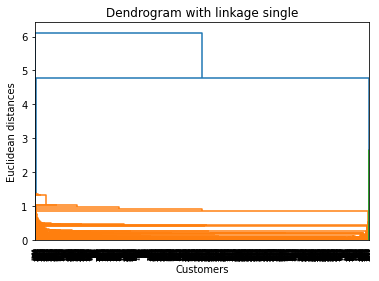

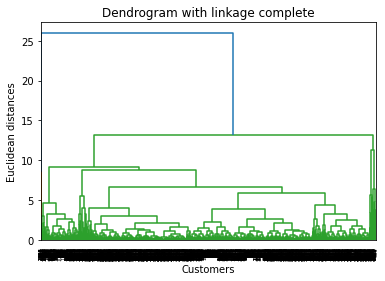

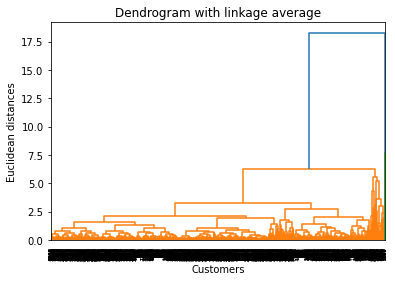

In [149]:
## iterative plot for different linkages
for i in range(0,len(li)):


  dendro = sch.dendrogram(sch.linkage(X_projected, method = li[i]))
  plt.title('Dendrogram with linkage '+li[i])
  plt.xlabel('Customers')
  plt.ylabel('Euclidean distances')
  plt.show()

As we can see complete and average linkkages are separating all points in single clusters we can now try ward linkage.

Ward uses Anova that is analysis of variance hence it is supirior in clustering datapoints than rest methods which just consider distance measures.

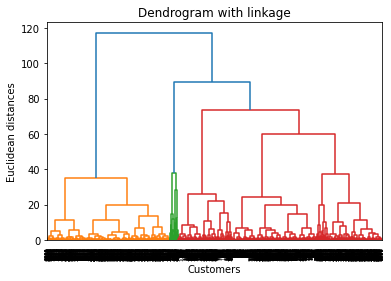

In [132]:
## Finding optimal clusters
dendro_ward = sch.dendrogram(sch.linkage(X_projected, method = "ward"))
plt.title('Dendrogram with linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [136]:
unique_colours = set(dendro_ward["color_list"])

In [137]:
##optimal clusters

optimal_clusters = len(unique_colours)-1

In [138]:
optimal_clusters

3

- With PCA we get better model with less noise and we have summerized 12 componets in just 2 PCA components.
- As per graph we have 3 optimum clusters for Airline customers dataset.

In [18]:
import math


def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link

In [112]:
import math



class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        #0-single_link, 1-complete_link, 2-average_link"
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()



  
    def distance(p, q):
      return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)


    ####### custom clusters function to print hierarchial clusters
    def print(self):

   
      
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                
                x = point[0]
                y = point[1]
                plt.scatter(x, y)

            plt.show()
    

In [104]:
## converting numpy array into dataframe
d = {"PCA1": X_projected[:,0], "PCA2": X_projected[:,1]}
df = pd.DataFrame(d)

In [105]:
df.shape

(3999, 2)

In [106]:
## Using few the rows of dataframe as randomly shuffled samples
df = df.sample(frac=0.125).reset_index(drop=True)

In [139]:
df.shape

(500, 2)

Here we are randomly selecting 500 records from 4000 records to fed to Hierarchial model.

In [ ]:
### converting dataframe back to numpy array
df.values

### **0) Single Link**

In [141]:
agg_hierarchical_clustering_single = AgglomerativeHierarchicalClustering(df.values, 3, 0)
agg_hierarchical_clustering_single.run_algorithm()

Cluster: 0


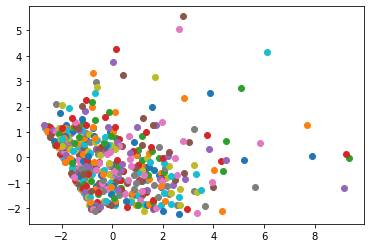

Cluster: 1


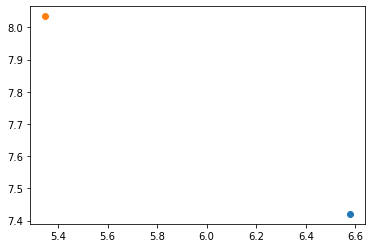

Cluster: 2


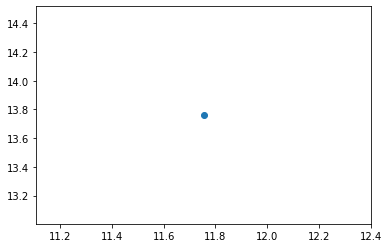

In [142]:
agg_hierarchical_clustering_single.print()

Insights:

Hierarchial method with single linkage has separated 3 clusters last cluster is showing clear outlier.

For each cluster we are having custom print function to display the datapoints within that cluster and there by showing 3 graphs.

The PCA component 1 is going from negative axis to positive and separating clusters shown as per PCA component 1 and 2 increases

### **1) Complete Link**

In [143]:
agg_hierarchical_clustering_complete = AgglomerativeHierarchicalClustering(df.values, 3, 1)
agg_hierarchical_clustering_complete.run_algorithm()

Cluster: 0


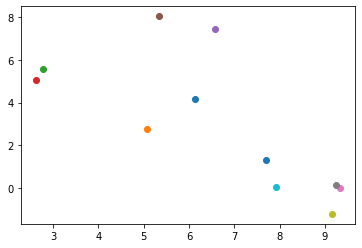

Cluster: 1


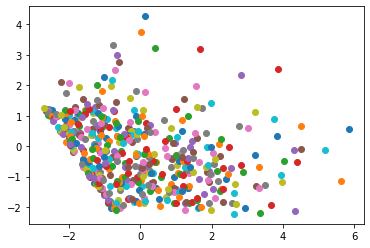

Cluster: 2


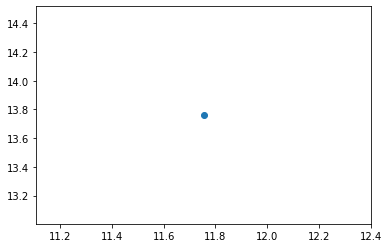

In [144]:
agg_hierarchical_clustering_complete.print()

Insights:

Hierarchial method has separated points in 3 clusters based on complete linkage.

For each cluster we are having custom print function to display the datapoints within that cluster and there by showing 3 graphs.



### **2) Average Link**

Now let's see the average link clusters.

In [145]:
agg_hierarchical_clustering_average = AgglomerativeHierarchicalClustering(df.values, 3, 2)
agg_hierarchical_clustering_average.run_algorithm()

Cluster: 0


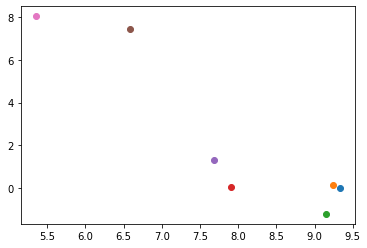

Cluster: 1


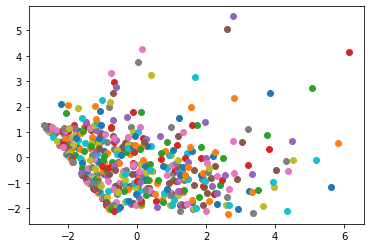

Cluster: 2


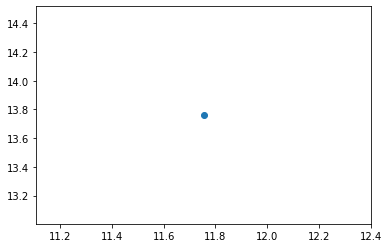

In [146]:
agg_hierarchical_clustering_average.print()

Insights:

Hierarchial method has separated poings in 3 clusters based on Average linkage.

For each cluster we are having custom print function to display the datapoints within that cluster and there by showing 3 graphs.

Complete and Average linkages are having similar separation but single linkage is different.

# **3) DBScan cluster**

[[0.9268429  0.5421246  0.22176575 0.49343416]
 [0.92978948 0.47714745 0.61983795 0.45965816]
 [0.98070062 0.57758797 0.55819205 0.55262771]
 [0.9391177  0.49595429 0.5680637  0.56053933]
 [0.93820261 0.57900437 0.2405278  0.51053401]
 [0.73487907 0.48708615 0.         0.35971797]
 [0.91222947 0.5068694  0.38024214 0.61872656]
 [0.91641398 0.48145823 0.25969447 0.55987984]
 [0.93503939 0.53865278 0.80560657 0.41889325]
 [0.95573063 0.54570336 0.56827674 0.47132154]
 [0.85185568 0.52743487 0.09184133 0.37678542]
 [0.90945341 0.48979158 0.32052315 0.59839583]
 [0.97050487 0.58324929 0.7226731  0.42588015]
 [1.         0.67594837 0.84225469 0.40973797]
 [0.85484523 0.7095862  0.24241567 0.16303952]
 [0.72411925 0.56155327 0.02877608 0.22261474]
 [0.823545   0.58399397 0.12159029 0.34826381]
 [0.87232134 0.47762762 0.15388088 0.5172906 ]
 [0.72464526 0.50533074 0.00955596 0.2504979 ]
 [0.83625357 0.50041861 0.06919897 0.47723139]
 [0.81576148 0.42268056 0.11270432 0.40202533]
 [0.81574522 

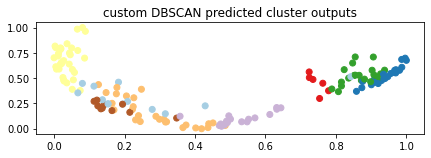

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

#Custom estimator for gridsearch 
class MyClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self,e=0,minp=0):
       
        self.e =e
        self.minp=minp
        
        
    def fit(self, X,Y):
        self.Y=Y
  
		#print(self.Y)
        DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
		#print(DistanceMatrix)

        core_point_array=np.zeros(150)
        cluster_array=np.zeros(150)
        PointNeighbors=[]
		
        e=self.e
        k=self.minp
		#print(e)
        w=0
        for i in range(len(DistanceMatrix)):
	
            PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
            if len(PointNeighbors)>=k:
                core_point_array[i]=1
                if cluster_array[i]==0:
                    cluster_array[i]=w
                    w=w+1
		
                for x in range(len(PointNeighbors)):
					#print(cluster_array[PointNeighbors[x]])
                    if cluster_array[PointNeighbors[x]]==0:
                        cluster_array[PointNeighbors[x]]=cluster_array[i]
		
		
		
			
				#print(PointNeighbors)
		
	
        for x in range(len(cluster_array)):
            cluster_array[x]=cluster_array[x]-1	


	
		#print('Number of core points -'+str( np.count_nonzero(core_point_array)))	
		#print('Number of clusters -'+str( np.count_nonzero(cluster_array)))	

		#print(target_data)
		#print(core_point_array)
		#print(cluster_array)
		
        self.cluster_array=cluster_array
        return cluster_array
       
       
       
    def predict(self, X):
         # Some code
         return self.cluster_array 


    def score(self, X, Y):
        dt=f1_score(self.Y,self.cluster_array,average='weighted')
        print('Accuracy -'+str(dt))
        return (dt)

        
        
def DBSCAN(normalised_distance):


	DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalised_distance, 'euclidean'))
	#print(DistanceMatrix)

	core_point_array=np.zeros(150)
	cluster_array=np.zeros(150)
	PointNeighbors=[]
	e=0.3
	k=18
	w=0
	for i in range(len(DistanceMatrix)):
	
		PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
		if len(PointNeighbors)>=k:
			core_point_array[i]=1
			if cluster_array[i]==0:
				cluster_array[i]=w
				w=w+1
		
			for x in range(len(PointNeighbors)):
				#print(cluster_array[PointNeighbors[x]])	
				if cluster_array[PointNeighbors[x]]==0:
					cluster_array[PointNeighbors[x]]=cluster_array[i]
		
		
		
			
			#print(PointNeighbors)
		
	
	for x in range(len(cluster_array)):
			cluster_array[x]=cluster_array[x]-1	


	
	#print('Number of core points -'+str( np.count_nonzero(core_point_array)))	
	#print('Number of clusters -'+str( np.count_nonzero(cluster_array)))	

	#print(target_data)
	#print(core_point_array)
	print(cluster_array)

	return cluster_array


###################################################################################################
#Getting iris data

iris =load_iris()
input_data=iris.data
#target_data=iris.target

###################################################################################################
#Data Manipulations before introducing to the algorithm

poly = PolynomialFeatures(2)
input_data=poly.fit_transform(input_data)  
#print(input_data)

input_data=QuantileTransformer(n_quantiles=40, random_state=0).fit_transform(input_data)

scaler = MinMaxScaler()
 
scaler.fit(input_data)
normalised_input_data=scaler.transform(input_data)

distan=pairwise_distances(normalised_input_data,metric='euclidean')


scaler.fit(distan)
normalised_distance=scaler.transform(distan)


sscaler = StandardScaler()
sscaler.fit(normalised_distance)
normalised_distance=sscaler.transform(normalised_distance)


pca = PCA(n_components=4)
normalised_distance = pca.fit_transform(normalised_distance)

scaler.fit(normalised_distance)
normalised_distance=scaler.transform(normalised_distance)


print(normalised_distance)
print('normalised_distance')


##############################################################################################
#Training the algorithm using GridSearch



eps_values= np.arange(0.1,0.5 ,0.001)
min_sample_values = np.arange(2,30,1)

params = {
    'e':eps_values,
    'minp':min_sample_values
}
cv = [(slice(None), slice(None))]
gs = GridSearchCV(MyClassifier(), param_grid=params, cv=cv)

#gs.fit(normalised_distance,normalised_distance)

#print(gs.best_params_)

#para=gs.best_params_



#############################################################################################
#Testing the best selected parameters by plotting 


#e=para['e']
#k=para['minp']


cluster_array=DBSCAN(normalised_distance)


#print(target_data)
#print(cluster_array.astype(int))

#print('precision_score- '+str(precision_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))
#print('recall_score- '+str(recall_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))

plt.subplot(2, 1, 1)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=cluster_array, cmap='Paired')
plt.title("custom DBSCAN predicted cluster outputs")

#plt.subplot(2, 1, 2)
#plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=target_data, cmap='Paired')
#plt.title("Actual target outputs")

plt.tight_layout()
plt.show()




Insights:

As compared to KMeans DBscan has better cluster patterns with values spread in 8 clusters.

As Features are scaled for Kmeans being distance based algorithm it gave 2 as optimal cluster.

Whereas DBscan being density based technique it is performing better and further separation of datapoints wich are density packed is shown in the plot.

In Kmeans and Hierarchial PCA components can be used to reduce noice and better performace as they are distance based but not with DBscan.

